In [18]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

print("Setup Done...")

Setup Done...


### Loading dataset

In [7]:
train_file_name = 'drugsComTrain_raw.csv'
test_file_name = 'drugsComTest_raw.csv'
file_path = './data/'

df_test = pd.read_csv(file_path+test_file_name)
df_train = pd.read_csv(file_path+train_file_name)

In [8]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
print(df_train.describe())
print(df_test.describe())

            uniqueID         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000
            uniqueID        rating   usefulCount
count   53766.000000  53766.000000  53766.000000
mean   116386.701187      6.976900     27.989752
std     67017.739881      3.285207     36.172833
min         0.000000      1.000000      0.000000
25%     58272.500000      4.000000      6.000000
50%    116248.500000      8.000000     16.000000
75%    174586.750000     10.000000     36.000000
max    232284.000000     10.000000    949.000000


### Checking ASCII characters in string

In [4]:
rows,_ = df_train.shape
ctr = 0
ctr2 = 0
for row in range(rows):
    ctr = ctr + df_train.iloc[row]['review'].count('&#')
    ctr2 = ctr2 + df_train.iloc[row]['review'].count('&#039;')
#     print(df_train.iloc[row]['review'])
#     print(df_train.iloc[row]['review'].count('&#'))
print(ctr)
print(ctr2)
# since both the counts are same we can say that only ASCII car present is apostrophy.

262415
262415


In [10]:
# Replacing ASCII cahracters from review
rows,_ = df_train.shape
for row in range(rows):
    tmp = df_train.iloc[row]['review'].replace('&#039;',"'")
    df_train.at[row,'review'] = tmp

rows,_ = df_test.shape
for row in range(rows):
    tmp = df_test.iloc[row]['review'].replace('&#039;',"'")
    df_test.at[row,'review'] = tmp
    
# # To check id values were replaced    
# for row in range(15):
#     print(df_train.iloc[row]['review'])

### Checking for NAN or na values

In [11]:
train_na = df_train.isna().values
np.argwhere(train_na==True).shape
print("values with nan ", np.argwhere(train_na==True).shape)

train_null = df_train.isnull().values
print("values with null",np.argwhere(train_null==True).shape)

# check if the NAN and null values are at same place
print("values are same" if (train_na == train_null).prod()==1 else "values are different")


values with nan  (899, 2)
values with null (899, 2)
values are same


### Figure out what colums have missing values

In [12]:
missing_indexes = np.argwhere(train_na==True)

# unique_cols with missing data
missing_cols = np.unique(missing_indexes[:,1])
for m_c in missing_cols:
    print('Index of missing columns ->', m_c, \
          '\nName of missing columns ->',df_train.columns[m_c],'\n\n')
# so we can see only column name condition is missing


Index of missing columns -> 2 
Name of missing columns -> condition 




In [13]:
# Print top 5 rows of missing index, to check the type o missing values (MAR,MCAR,NMAR)
missing_rows = missing_indexes[:,0]
print("Total missing values rows : ", len(missing_rows))
for r in missing_rows[:5]:
    print("------------------------------------------------------")
    print("------------------------------------------------------")
    print(df_train.iloc[r]['review'])
#     print(df_train.iloc[r])    #------uncomment line for full view of row
    print("------------------------------------------------------")
    print("------------------------------------------------------\n\n")
    


Total missing values rows :  899
------------------------------------------------------
------------------------------------------------------
"Very good response. It is so useful for me. "
------------------------------------------------------
------------------------------------------------------


------------------------------------------------------
------------------------------------------------------
"Accurate information."
------------------------------------------------------
------------------------------------------------------


------------------------------------------------------
------------------------------------------------------
"So far so good. Good for me and I can take it everyday. Can't remember the last time I slept 7 hours straight."
------------------------------------------------------
------------------------------------------------------


------------------------------------------------------
------------------------------------------------------
"I have

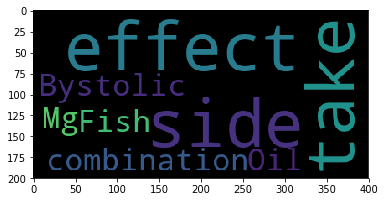

In [20]:

wc = WordCloud(stopwords=STOPWORDS).generate(df_train.review[0])
plt.imshow(wc)

# ' '.join(text2['Crime Type'])

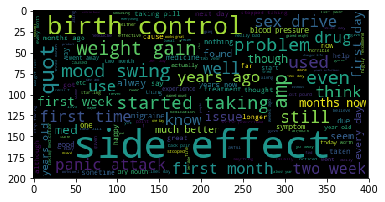

In [22]:
wc = WordCloud(stopwords=STOPWORDS).generate(' '.join(df_train['review']))
plt.imshow(wc)